In [16]:
import pandas
import numpy
import matplotlib.pyplot as plot
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


Читаем iris.csv и раскладываем по массивам - в X_eval и Y_eval данные и лейблы соответственно. Затем преобразуем категории лейблов к кодам.

In [17]:
# encode labels into tensor compatible labels
def encode_labels(labels):
    encoder = LabelEncoder()
    encoder.fit(labels)
    # to numbers [0, 0, ..., 1, 1, ..., 2, 2]
    encoded_labels = encoder.transform(labels)
    # to categories ([0, 0, 1], [0, 1, 0], [1, 0, 0]) 
    return to_categorical(encoded_labels)

# parse input from csv

dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values

X_train = dataset[:,0:4].astype(float)

Y_train = dataset[:,4]
Y_train = encode_labels(Y_train)

Методы для инициализации и обучения модели, и вывода статистики по модели:

In [18]:

def print_history_stat(history):
    print("[Last epoch] Loss: ", history.history["loss"][-1], 
    " Accuracy: ", history.history["accuracy"][-1])

def compile_and_fit(model, epoch_num=50, batch_sz=50, val_split=0.1, verb=0):
    model.compile(optimizer='adam',loss='categorical_crossentropy',
    metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=epoch_num, batch_size=batch_sz,
    validation_split=val_split, verbose=verb)
    print_history_stat(history)
    return history

Исследуем влияние числа нейронов на результаты работы сети:
- 16 нейронов
- 32 нейрона
- 64 нейрона
Плюс слой входных данных (который добавляется по-умолчанию) и слой выходных данных:

Model 1 (16n):
[Last epoch] Loss:  0.9606818556785583  Accuracy:  0.7407407164573669
Model 2 (32n):
[Last epoch] Loss:  0.6332588195800781  Accuracy:  0.8592592477798462
Model 3 (64n):
[Last epoch] Loss:  0.4293178617954254  Accuracy:  0.9111111164093018


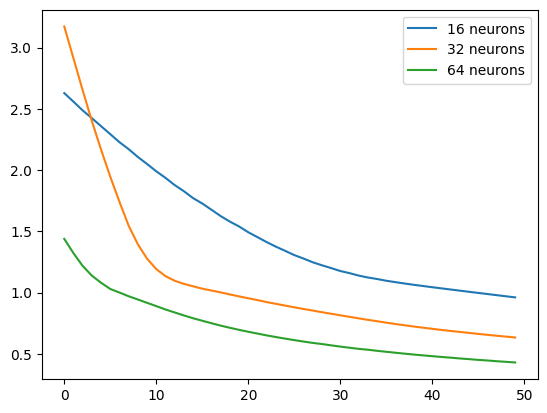

<Figure size 640x480 with 0 Axes>

In [19]:
print("Model 1 (16n):")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="16 neurons")

print("Model 2 (32n):")
his = compile_and_fit(Sequential([
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="32 neurons")

print("Model 3 (64n):")
his = compile_and_fit(Sequential([
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="64 neurons")
plot.legend()
plot.show()
plot.clf()

Исследуем влияние числа слоёв на результаты работы сети, модели:
- 1 слой с 16 нейронами
- 2 слоя с 16 нейронами 
- 3 слоя с 16 нейронами 
- 4 слоя с 16 нейронами 

1x 16n layer:
[Last epoch] Loss:  0.8251866698265076  Accuracy:  0.7259259223937988
2x 16n layers:
[Last epoch] Loss:  0.5328812003135681  Accuracy:  0.8814814686775208
3x 16n layers:
[Last epoch] Loss:  1.0267654657363892  Accuracy:  0.5333333611488342
4x 16n layers:
[Last epoch] Loss:  0.37362992763519287  Accuracy:  0.9481481313705444


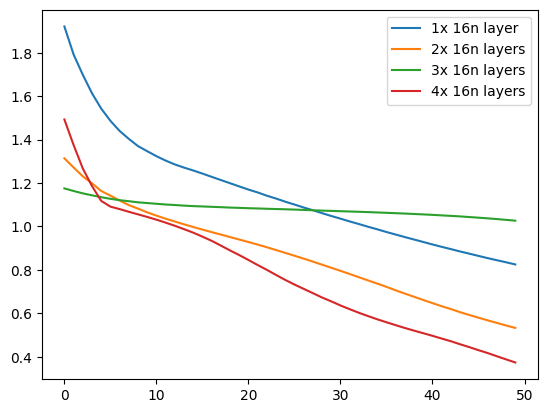

<Figure size 640x480 with 0 Axes>

In [20]:
print("1x 16n layer:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="1x 16n layer")

print("2x 16n layers:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="2x 16n layers")

print("3x 16n layers:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="3x 16n layers")

print("4x 16n layers:")
his = compile_and_fit(Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
]))
plot.plot(his.history["loss"], label="4x 16n layers")

plot.legend()
plot.show()
plot.clf()

Влияние числа эпох на результаты сети (10, 50 и 100 эпох):

In [21]:
for en in [10, 50, 100]:
    compile_and_fit(
        Sequential([
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(3, activation='softmax')
        ]),
        epoch_num=en
    )


[Last epoch] Loss:  0.9396809935569763  Accuracy:  0.7407407164573669
[Last epoch] Loss:  0.3595563471317291  Accuracy:  0.9333333373069763
[Last epoch] Loss:  0.30006346106529236  Accuracy:  0.9629629850387573


Влияние размера пакета на результаты работы сетей:

In [24]:
for bs in [10, 30, 90]:
    compile_and_fit(
        Sequential([
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(3, activation='softmax')
        ]),
        batch_sz=bs
    )

[Last epoch] Loss:  0.40887537598609924  Accuracy:  0.9629629850387573
[Last epoch] Loss:  0.5431057810783386  Accuracy:  0.9777777791023254
[Last epoch] Loss:  0.9172137975692749  Accuracy:  0.4740740656852722


Влияние величины validation_split (процента данных, которые остаются под валидацию, а не обучение) на результаты работы сети:

In [33]:
for vs in [0.01, 0.05, 0.1, 0.25, 0.5]:
    compile_and_fit(
        Sequential([
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(3, activation='softmax')
        ]),
        val_split=vs
    )

[Last epoch] Loss:  0.29269054532051086  Accuracy:  0.9797297120094299
[Last epoch] Loss:  0.3021432161331177  Accuracy:  0.9647887349128723
[Last epoch] Loss:  0.3266505002975464  Accuracy:  0.9481481313705444
[Last epoch] Loss:  0.4979220926761627  Accuracy:  0.8928571343421936
[Last epoch] Loss:  0.3062386214733124  Accuracy:  1.0
